In [190]:
np.sqrt(4)


2.0

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
class NewtonCannon:
    def __init__(self, radius, v0, height, g, massCenter, massObject, delta):
        self.radius = radius
        self.v = [v0, 0]
        self.height=height
        self.coord = [0, radius + height]
        self.xpath = [0]
        self.ypath = [radius+height]
        self.g = g
        self.massCenter = massCenter # mass of the object that is being orbitted around
        self.massObject = massObject
        self.delta = delta
        self.G = 6.67408e-11 # gravitational constant
        self.timestep = 0
    def step(self):
        self.timestep += 1
        direction = self.coord / LA.norm(self.coord)
        g_force = - self.G * self.massCenter * self.massObject / LA.norm(self.coord)**2
        a = direction * g_force/self.massObject
        # updates 
        self.v = self.v + a * self.delta
        self.coord = self.coord + self.v * self.delta
        self.xpath.append(self.coord[0])
        self.ypath.append(self.coord[1])
    def main(self, threshold):
        while LA.norm(self.coord) > self.radius: # condition to check whether the projectile hits the ground
            if threshold == self.timestep:
                break
            self.step()
            
    def show(self):
        
        # plot the center object
        ax = plt.gca()
        # plot path
        ax.plot(self.xpath, self.ypath, label="path")
        boundary_min = self.radius + self.height
        xmin, xmax = min(-boundary_min, min(self.xpath)), max(boundary_min, max(self.xpath))
        ymin, ymax = min(-boundary_min, min(self.ypath)), max(boundary_min, max(self.ypath))
        
        
        ax.add_artist(plt.Circle((0,0), self.radius, color='green'))
        plt.legend()
        plt.show()

In [179]:
earthmass = 5.972e24
earthRadius = 6371e3
sim = NewtonCannon(earthRadius, 5000, 12, 9.8, earthmass, 10, 1e-3)

In [180]:
sim.main(5000)

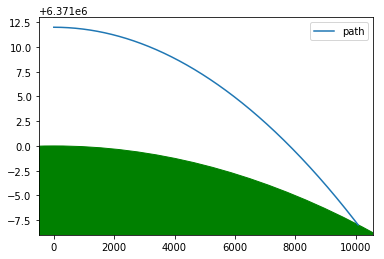

In [181]:
sim.show()

In this scenario, the cannon ball falls down almost immediately. Let's experiment with other speed

At velocity: 1000.0


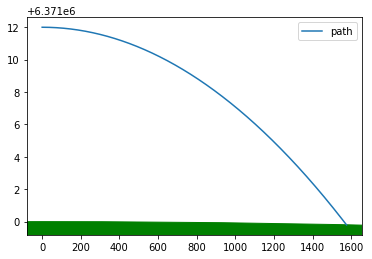

At velocity: 2000.0


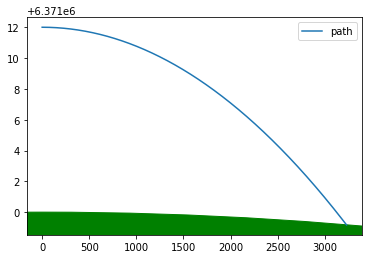

At velocity: 3000.0


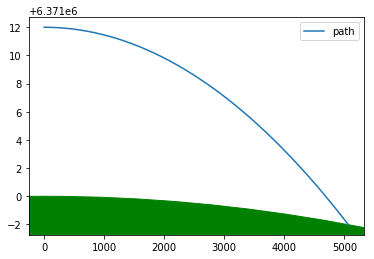

At velocity: 4000.0


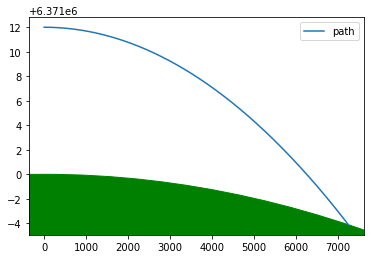

At velocity: 5000.0


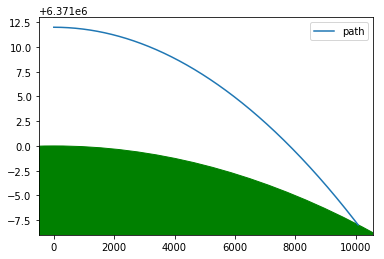

At velocity: 6000.0


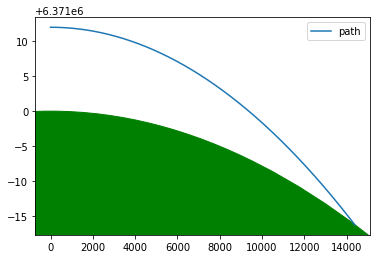

At velocity: 7000.0


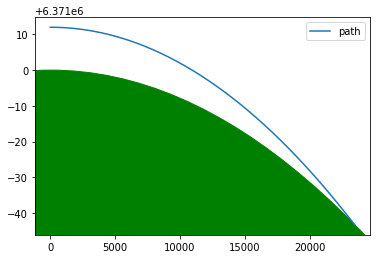

At velocity: 8000.0


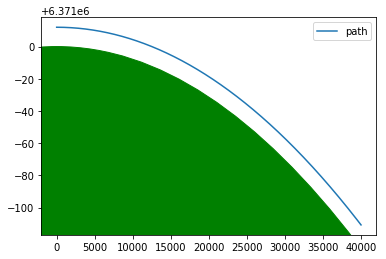

At velocity: 9000.0


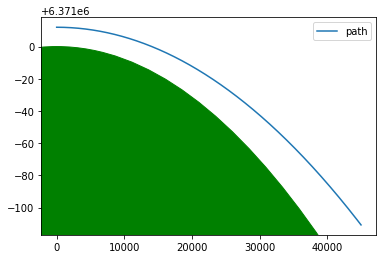

At velocity: 10000.0


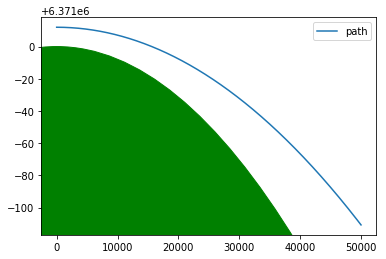

In [182]:
velocities = np.linspace(1000, 10000, 10)
for v in velocities:
    print(f"At velocity: {v}")
    sim = NewtonCannon(earthRadius, v, 12, 9.8, earthmass, 10, 1e-3)
    sim.main(5000)
    sim.show()

We can see that we transitioned from hitting the ground to being tossed out between 7000 m/s and 9000 m/s. 8000 m/s seems to be promising as an orbit.

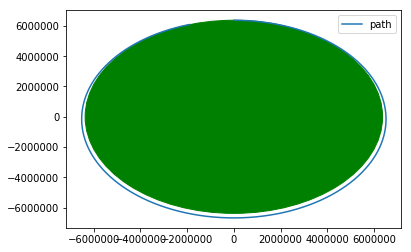

In [186]:
# 8000 m/s
sim = NewtonCannon(earthRadius, 8000, 12, 9.8, earthmass, 10, 1e-1)
sim.main(50000)
sim.show()

After adjusting for the timesteps so that it goes faster but not so much that it hits the ground right away, we see that it gets really close to a full orbit.

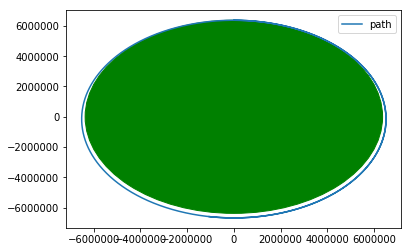

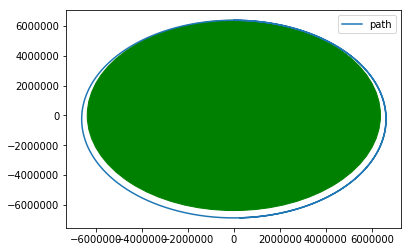

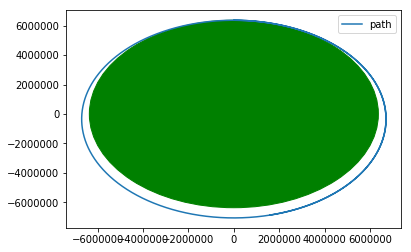

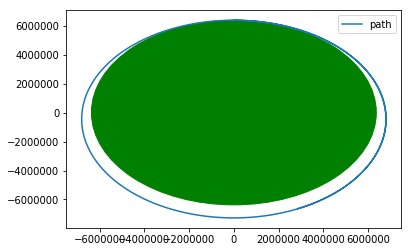

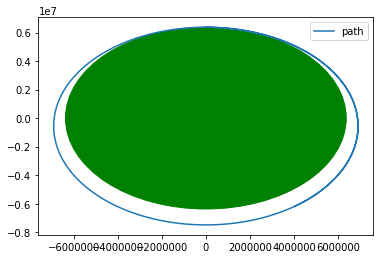

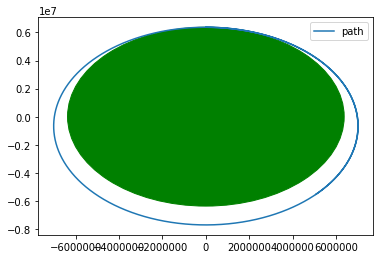

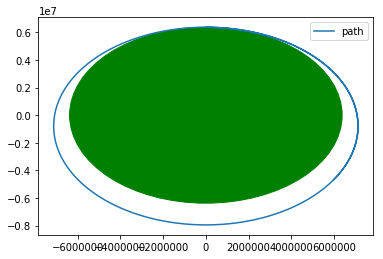

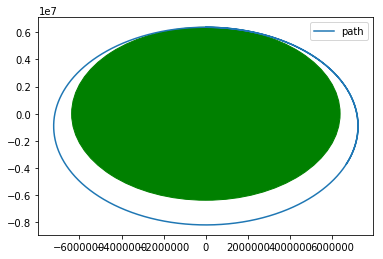

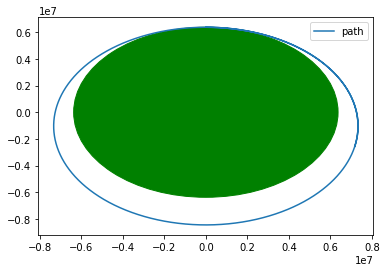

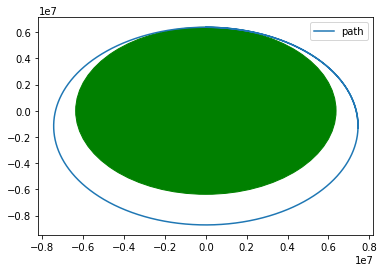

In [189]:
velocities = np.linspace(8000, 8500, 10)
for v in velocities:
    sim = NewtonCannon(earthRadius, v, 12, 9.8, earthmass, 10, 1e-1)
    sim.main(80000)
    sim.show()

We seem to have gotten a few good orbits as we get closer to 8000 m/s, as we get close to 8500 m/s, however, even though it eventually goes back to the original point, the height it takes during the flight is very large.

### What matrices did you use to ensure that the cannonball is in orbit?
I simulated the cannonball at various velocities and visualize the orbits to see whether or not the projectile is able to make a full orbit.

### Why in reality it might not be as simple as in this simulation?
In reality, other external forces such as air drag may influence the projectile motion in question, especially as we are close to the surface of the earth.

### How might this relate to projectile motion?
In the simulation, I used the update functiosn I would use in a projectile motion. This is essentially a projectile motion problem as the dominating force in this simulation is the force of gravity and we are finding the pathway of a projectile.